# Final Project: Advanced SQL Techniques

# Objectives

After completing this lab, you will be able to:

- Use joins to query data from multiple tables

- Create and query views

- Write and run stored procedures

- Use transactions

In [1]:
%load_ext sql

In [2]:
%sql ibm_db_sa://jdq93423:amEOLV8fXxRqntXF@ea286ace-86c7-4d5b-8580-3fbfa46b1c66.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31505/BLUDB?security=SSL

# Exercise 1: Using Joins

Question 1
Write and execute a SQL query to list the school names, community names and average attendance for communities with a hardship index of 98.

In [4]:
%%sql

SELECT S.NAME_OF_SCHOOL, S.AVERAGE_STUDENT_ATTENDANCE, C.COMMUNITY_AREA_NAME
FROM CHICAGO_PUBLIC_SCHOOLS AS S
LEFT OUTER JOIN CHICAGO_CENSUS_DATA AS C ON S.COMMUNITY_AREA_NUMBER = C.COMMUNITY_AREA_NUMBER
WHERE C.HARDSHIP_INDEX = 98;

 * ibm_db_sa://jdq93423:***@ea286ace-86c7-4d5b-8580-3fbfa46b1c66.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31505/BLUDB
Done.


name_of_school,average_student_attendance,community_area_name
George Washington Carver Military Academy High School,91.60%,Riverdale
George Washington Carver Primary School,90.90%,Riverdale
Ira F Aldridge Elementary School,92.90%,Riverdale
William E B Dubois Elementary School,93.30%,Riverdale


Question 2
Write and execute a SQL query to list all crimes that took place at a school. Include case number, crime type and community name.

In [6]:
%%sql

SELECT CR.CASE_NUMBER, CR.PRIMARY_TYPE, C.COMMUNITY_AREA_NAME
FROM CHICAGO_CRIME_DATA AS CR
LEFT OUTER JOIN CHICAGO_CENSUS_DATA AS C ON CR.COMMUNITY_AREA_NUMBER = C.COMMUNITY_AREA_NUMBER
WHERE LOCATION_DESCRIPTION LIKE '%SCHOOL%';

 * ibm_db_sa://jdq93423:***@ea286ace-86c7-4d5b-8580-3fbfa46b1c66.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31505/BLUDB
Done.


case_number,primary_type,community_area_name
HK577020,NARCOTICS,Rogers Park
HL725506,BATTERY,Lincoln Square
HH639427,BATTERY,Austin
HS200939,CRIMINAL DAMAGE,Austin
HT315369,ASSAULT,East Garfield Park
HP716225,BATTERY,Douglas
HL353697,BATTERY,South Shore
HS305355,NARCOTICS,Brighton Park
JA460432,BATTERY,Ashburn
HR585012,CRIMINAL TRESPA,Ashburn


# Exercise 2: Creating a View

Question 1
Write and execute a SQL statement to create a view showing the columns listed in the following table, with new column names as shown in the second column.

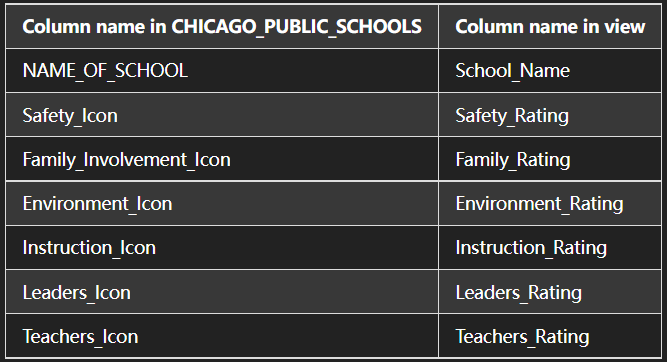



Write and execute a SQL statement that returns all of the columns from the view.

Write and execute a SQL statement that returns just the school name and leaders rating from the view.

In [12]:
%%sql

CREATE VIEW NEW_CHICAGO_SCHOOL_VIEW (School_Name, Safety_Rating, Family_Rating, Environment_Rating, Instruction_Rating, Leaders_Rating, Teachers_Rating) AS 
SELECT NAME_OF_SCHOOL, Safety_Icon, Family_Involvement_Icon, Environment_Icon, Instruction_Icon, Leaders_Icon, Teachers_Icon
FROM CHICAGO_PUBLIC_SCHOOLS;

 * ibm_db_sa://jdq93423:***@ea286ace-86c7-4d5b-8580-3fbfa46b1c66.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31505/BLUDB
Done.


[]

In [13]:
%%sql

SELECT *
FROM NEW_CHICAGO_SCHOOL_VIEW

 * ibm_db_sa://jdq93423:***@ea286ace-86c7-4d5b-8580-3fbfa46b1c66.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31505/BLUDB
Done.


school_name,safety_rating,family_rating,environment_rating,instruction_rating,leaders_rating,teachers_rating
Abraham Lincoln Elementary School,Very Strong,Very Strong,Strong,Strong,Weak,Strong
Adam Clayton Powell Paideia Community Academy Elementary School,Average,Strong,Strong,Very Strong,Weak,Strong
Adlai E Stevenson Elementary School,Strong,NDA,Average,Weak,Weak,NDA
Agustin Lara Elementary Academy,Average,Average,Average,Weak,Weak,Average
Air Force Academy High School,Average,Strong,Strong,Average,Weak,Average
Albany Park Multicultural Academy,Strong,Weak,Strong,Strong,Weak,Average
Albert G Lane Technical High School,Very Strong,NDA,Strong,Average,Weak,NDA
Albert R Sabin Elementary Magnet School,Strong,NDA,Weak,Very Weak,Weak,NDA
Alcott High School for the Humanities,Strong,NDA,Strong,Average,Weak,NDA
Alessandro Volta Elementary School,Average,Strong,Weak,Weak,Weak,Average


In [14]:
%%sql

SELECT School_Name, Leaders_Rating 
FROM NEW_CHICAGO_SCHOOL_VIEW

 * ibm_db_sa://jdq93423:***@ea286ace-86c7-4d5b-8580-3fbfa46b1c66.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31505/BLUDB
Done.


school_name,leaders_rating
Abraham Lincoln Elementary School,Weak
Adam Clayton Powell Paideia Community Academy Elementary School,Weak
Adlai E Stevenson Elementary School,Weak
Agustin Lara Elementary Academy,Weak
Air Force Academy High School,Weak
Albany Park Multicultural Academy,Weak
Albert G Lane Technical High School,Weak
Albert R Sabin Elementary Magnet School,Weak
Alcott High School for the Humanities,Weak
Alessandro Volta Elementary School,Weak


# Exercise 3: Creating a Stored Procedure

The icon fields are calculated based on the value in the corresponding score field. You need to make sure that when a score field is updated, the icon field is updated too. To do this, you will write a stored procedure that receives the school id and a leaders score as input parameters, calculates the icon setting and updates the fields appropriately.

Question 1
Write the structure of a query to create or replace a stored procedure called UPDATE_LEADERS_SCORE that takes a in_School_ID parameter as an integer and a in_Leader_Score parameter as an integer. Don’t forget to use the #SET TERMINATOR statement to use the @ for the CREATE statement terminator.

In [ ]:
%%sql

CREATE OR REPLACE PROCEDURE UPDATE_LEADERS_SCORE (IN in_School_ID INTEGER(1000000), IN in_Leader_Score INTEGER(100)) -- Name of this stored procedure routine
LANGUAGE SQL                                                -- Language used in this routine 
MODIFIES SQL DATA                                           -- This routine will only write/modify data in the table
@

Question 2
- Inside your stored procedure, write a SQL statement 
- to update the Leaders_Score field in the CHICAGO_PUBLIC_SCHOOLS table 
- for the school identified by in_School_ID to the value in the in_Leader_Score parameter.

In [ ]:
%%sql

CREATE OR REPLACE PROCEDURE UPDATE_LEADERS_SCORE (IN in_School_ID INTEGER(1000000), IN in_Leader_Score INTEGER(100)) -- Name of this stored procedure routine
LANGUAGE SQL                                                -- Language used in this routine 
MODIFIES SQL DATA                                           -- This routine will only write/modify data in the table

BEGIN
    UPDATE "CHICAGO_PUBLIC_SCHOOLS"
    SET "LEADERS_SCORE" = in_Leader_Score
    WHERE "School_ID" = in_School_ID
END 
@

Question 3
- Inside your stored procedure, write a SQL IF statement to update the Leaders_Icon field 
- in the CHICAGO_PUBLIC_SCHOOLS table for the school identified by in_School_ID using the following information

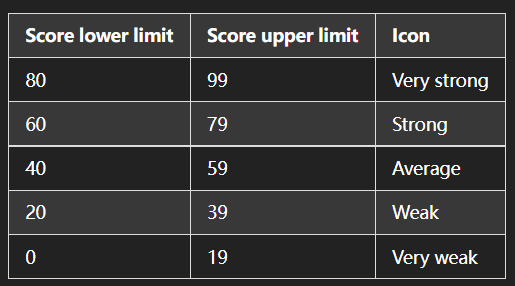

In [ ]:
%%sql

CREATE OR REPLACE PROCEDURE UPDATE_LEADERS_SCORE (IN in_School_ID INTEGER(1000000), IN in_Leader_Score INTEGER(100)) -- Name of this stored procedure routine
LANGUAGE SQL                                                -- Language used in this routine 
MODIFIES SQL DATA                                           -- This routine will only write/modify data in the table

BEGIN
    UPDATE "CHICAGO_PUBLIC_SCHOOLS"
    SET "LEADERS_SCORE" = in_Leader_Score
    WHERE "School_ID" = in_School_ID
    
    IF in_Leader_Score >= 80 and in_Leader_Score <= 99 THEN
        UPDATE "CHICAGO_PUBLIC_SCHOOLS"
        SET "Leaders_Icon" = 'Very Strong'
        WHERE "School_ID" = in_School_ID

    ELSEIF in_Leader_Score >= 60 and in_Leader_Score <= 79 THEN
        UPDATE "CHICAGO_PUBLIC_SCHOOLS"
        SET "Leaders_Icon" = 'Strong'
        WHERE "School_ID" = in_School_ID
    
    ELSEIF in_Leader_Score >= 40 and in_Leader_Score <= 59 THEN
        UPDATE "CHICAGO_PUBLIC_SCHOOLS"
        SET "Leaders_Icon" = 'Average'
        WHERE "School_ID" = in_School_ID
    
    ELSEIF in_Leader_Score >= 20 and in_Leader_Score <= 39 THEN
        UPDATE "CHICAGO_PUBLIC_SCHOOLS"
        SET "Leaders_Icon" = 'Weak'
        WHERE "School_ID" = in_School_ID
    
    ELSE in_Leader_Score >= 0 and in_Leader_Score <= 19 THEN
        UPDATE "CHICAGO_PUBLIC_SCHOOLS"
        SET "Leaders_Icon" = 'Very Weak'
        WHERE "School_ID" = in_School_ID
END 
@

Question 4
Run your code to create the stored procedure.
Take a screenshot showing the SQL query and its results.

In [44]:
%%sql
CREATE OR REPLACE PROCEDURE UPDATE_LEADERS_SCORE (
    IN in_School_ID  INTEGER, IN in_Leader_Score INTEGER) 
LANGUAGE SQL 
MODIFIES SQL DATA

    BEGIN
        UPDATE "CHICAGO_PUBLIC_SCHOOLS"
        SET Leaders_Score = in_Leader_Score
        WHERE School_ID = in_School_ID;

        IF in_Leader_Score >=  80 THEN 
            UPDATE "CHICAGO_PUBLIC_SCHOOLS"
            SET Leaders_Icon = 'Very_Strong'
            WHERE School_ID = in_School_ID;

        ELSEIF in_Leader_Score>= 60 and in_Leader_Score <= 79  THEN
            UPDATE "CHICAGO_PUBLIC_SCHOOLS"
            SET Leaders_Icon = 'Strong'
            WHERE School_ID = in_School_ID;

        ELSEIF in_Leader_Score >=  40 and in_Leader_Score <= 59  THEN
            UPDATE "CHICAGO_PUBLIC_SCHOOLS"
            SET Leaders_Icon = 'Average'
            WHERE School_ID = in_School_ID;

        ELSEIF in_Leader_Score >=  20 and in_Leader_Score <= 39  THEN
            UPDATE "CHICAGO_PUBLIC_SCHOOLS"
            SET Leaders_Icon = 'Weak'
            WHERE School_ID = in_School_ID;

        ELSEIF in_Leader_Score >=  0 and in_Leader_Score <= 19  THEN
            UPDATE "CHICAGO_PUBLIC_SCHOOLS"
            SET Leaders_Icon = 'Very Weak'
            WHERE School_ID = in_School_ID;
            
        ELSEIF
        END IF;
END
@

 * ibm_db_sa://jdq93423:***@ea286ace-86c7-4d5b-8580-3fbfa46b1c66.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31505/BLUDB
Done.


[]

Write a query to call the stored procedure, passing a valid school ID and a leader score of 50, to check that the procedure works as expected.

In [48]:
%%sql

CALL UPDATE_LEADERS_SCORE(1,50)

 * ibm_db_sa://jdq93423:***@ea286ace-86c7-4d5b-8580-3fbfa46b1c66.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31505/BLUDB
Done.


[]

# Exercise 4: Using Transactions

Question 1
Update your stored procedure definition. Add a generic ELSE clause to the IF statement that rolls back the current work if the score did not fit any of the preceding categories.

In [46]:
%%sql
--#SET TERMINATOR @
CREATE OR REPLACE PROCEDURE UPDATE_LEADERS_SCORE (
    IN in_School_ID  INTEGER, IN in_Leader_Score INTEGER) 
LANGUAGE SQL 
MODIFIES SQL DATA
  BEGIN
    UPDATE "CHICAGO_PUBLIC_SCHOOLS"
    SET Leaders_Score = in_Leader_Score
    WHERE School_ID = in_School_ID;
    IF in_Leader_Score >=  80 THEN 
        UPDATE "CHICAGO_PUBLIC_SCHOOLS"
        SET Leaders_Icon = 'Very_Strong'
        WHERE School_ID = in_School_ID;
    ELSEIF in_Leader_Score>= 60 and in_Leader_Score <= 79  THEN
        UPDATE "CHICAGO_PUBLIC_SCHOOLS"
        SET Leaders_Icon = 'Strong'
        WHERE School_ID = in_School_ID;
    ELSEIF in_Leader_Score >=  40 and in_Leader_Score <= 59  THEN
        UPDATE "CHICAGO_PUBLIC_SCHOOLS"
        SET Leaders_Icon = 'Average'
        WHERE School_ID = in_School_ID;
    ELSEIF in_Leader_Score >=  20 and in_Leader_Score <= 39  THEN
        UPDATE "CHICAGO_PUBLIC_SCHOOLS"
        SET Leaders_Icon = 'Weak'
        WHERE School_ID = in_School_ID;
    ELSEIF in_Leader_Score >= 0 and in_Leader_Score <= 19 THEN
        UPDATE "CHICAGO_PUBLIC_SCHOOLS"
        SET Leaders_Icon = 'Very Weak'
        WHERE School_ID = in_School_ID;   
    ELSE
        ROLLBACK WORK;
    END IF;
  END
@

 * ibm_db_sa://jdq93423:***@ea286ace-86c7-4d5b-8580-3fbfa46b1c66.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31505/BLUDB
Done.


[]

Question 2
Update your stored procedure definition again. Add a statement to commit the current unit of work at the end of the procedure.

In [47]:
%%sql
--#SET TERMINATOR @
CREATE OR REPLACE PROCEDURE UPDATE_LEADERS_SCORE (
    IN in_School_ID  INTEGER, IN in_Leader_Score INTEGER) 
LANGUAGE SQL 
MODIFIES SQL DATA
  BEGIN
    UPDATE "CHICAGO_PUBLIC_SCHOOLS"
    SET Leaders_Score = in_Leader_Score
    WHERE School_ID = in_School_ID;
    IF in_Leader_Score >=  80 THEN 
        UPDATE "CHICAGO_PUBLIC_SCHOOLS"
        SET Leaders_Icon = 'Very_Strong'
        WHERE School_ID = in_School_ID;
    ELSEIF in_Leader_Score>= 60 and in_Leader_Score <= 79  THEN
        UPDATE "CHICAGO_PUBLIC_SCHOOLS"
        SET Leaders_Icon = 'Strong'
        WHERE School_ID = in_School_ID;
    ELSEIF in_Leader_Score >=  40 and in_Leader_Score <= 59  THEN
        UPDATE "CHICAGO_PUBLIC_SCHOOLS"
        SET Leaders_Icon = 'Average'
        WHERE School_ID = in_School_ID;
    ELSEIF in_Leader_Score >=  20 and in_Leader_Score <= 39  THEN
        UPDATE "CHICAGO_PUBLIC_SCHOOLS"
        SET Leaders_Icon = 'Weak'
        WHERE School_ID = in_School_ID;
    ELSEIF in_Leader_Score >= 0 and in_Leader_Score <= 19 THEN
        UPDATE "CHICAGO_PUBLIC_SCHOOLS"
        SET Leaders_Icon = 'Very Weak'
        WHERE School_ID = in_School_ID;
    ELSEIF in_Leader_Score <= 0 and in_Leader_Score >= 100 THEN
    	ROLLBACK WORK;        
    ELSE
        COMMIT WORK;
    END IF;
  END
@

 * ibm_db_sa://jdq93423:***@ea286ace-86c7-4d5b-8580-3fbfa46b1c66.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31505/BLUDB
Done.


[]